# U-net demo
This is a demo of a U-Net style network applied to a type of images relevant for self-driving cars, where the aim is to segment different objects and backgrounds in a traffic scene.  
### Step 0: import packages

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap as lcm
import matplotlib.patches as mpatches
import os

os.chdir('/Users/ima029/Library/CloudStorage/OneDrive-UiTOffice365/Arkiverte prosjekter/Emner ved UiT/FYS-3033 Deep Learning/DL home exam')

from src.problem2.DataLoaders.camvid_loader import load_camvid

### Step 1: load images
The images are resized to be compatible with the network architecture.

In [2]:
x_tr, y_tr, x_te, y_te, _ = load_camvid('/Users/ima029/Library/CloudStorage/OneDrive-UiTOffice365/Arkiverte prosjekter/Emner ved UiT/FYS-3033 Deep Learning/DL home exam/Problem 2/data/')

new_size = 184, 240

x_tr = tf.image.resize(np.moveaxis(x_tr, 1, -1), new_size)
y_tr = tf.math.round(tf.image.resize(np.moveaxis(y_tr, 1, -1), new_size))
x_te = tf.image.resize(np.moveaxis(x_te, 1, -1), new_size)
y_te = tf.math.round(tf.image.resize(np.moveaxis(y_te, 1, -1), new_size))

num_classes = len(np.unique(y_tr))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-20 14:23:23.766456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-20 14:23:23.767211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Step 2: define the architecture

In [3]:
inputs = tf.keras.layers.Input(shape=x_tr.shape[1:])

x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
concat3 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(concat3)

x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
concat2 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(concat2)

x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
concat1 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(concat1)

x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Concatenate()([concat1, x])

x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Concatenate()([concat2, x])

x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Concatenate()([concat3, x])

x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(num_classes, 1)(x)
output = tf.keras.layers.Softmax()(x)

model = tf.keras.Model(inputs, output)

### Step 3: compile and fit model

In [4]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy())
model.fit(x_tr, y_tr, batch_size=32, epochs=100)

2022-06-20 14:23:37.784122: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-06-20 14:23:38.195981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 7s 386ms/step - loss: 2.0025
Epoch 2/100
15/15 [==============================] - 6s 376ms/step - loss: 1.4003
Epoch 3/100
15/15 [==============================] - 6s 375ms/step - loss: 1.1703
Epoch 4/100
15/15 [==============================] - 6s 376ms/step - loss: 1.0313
Epoch 5/100
15/15 [==============================] - 6s 374ms/step - loss: 0.9418
Epoch 6/100
15/15 [==============================] - 6s 374ms/step - loss: 0.8726
Epoch 7/100
15/15 [==============================] - 6s 376ms/step - loss: 0.8211
Epoch 8/100
15/15 [==============================] - 6s 376ms/step - loss: 0.7840
Epoch 9/100
15/15 [==============================] - 6s 377ms/step - loss: 0.7397
Epoch 10/100
15/15 [==============================] - 6s 376ms/step - loss: 0.7090
Epoch 11/100
15/15 [==============================] - 6s 377ms/step - loss: 0.6903
Epoch 12/100
15/15 [==============================] - 6s 376ms/step - loss: 0.6705
Epoch 13/100
15/15 [=====

### Step 4: Display segmented test images

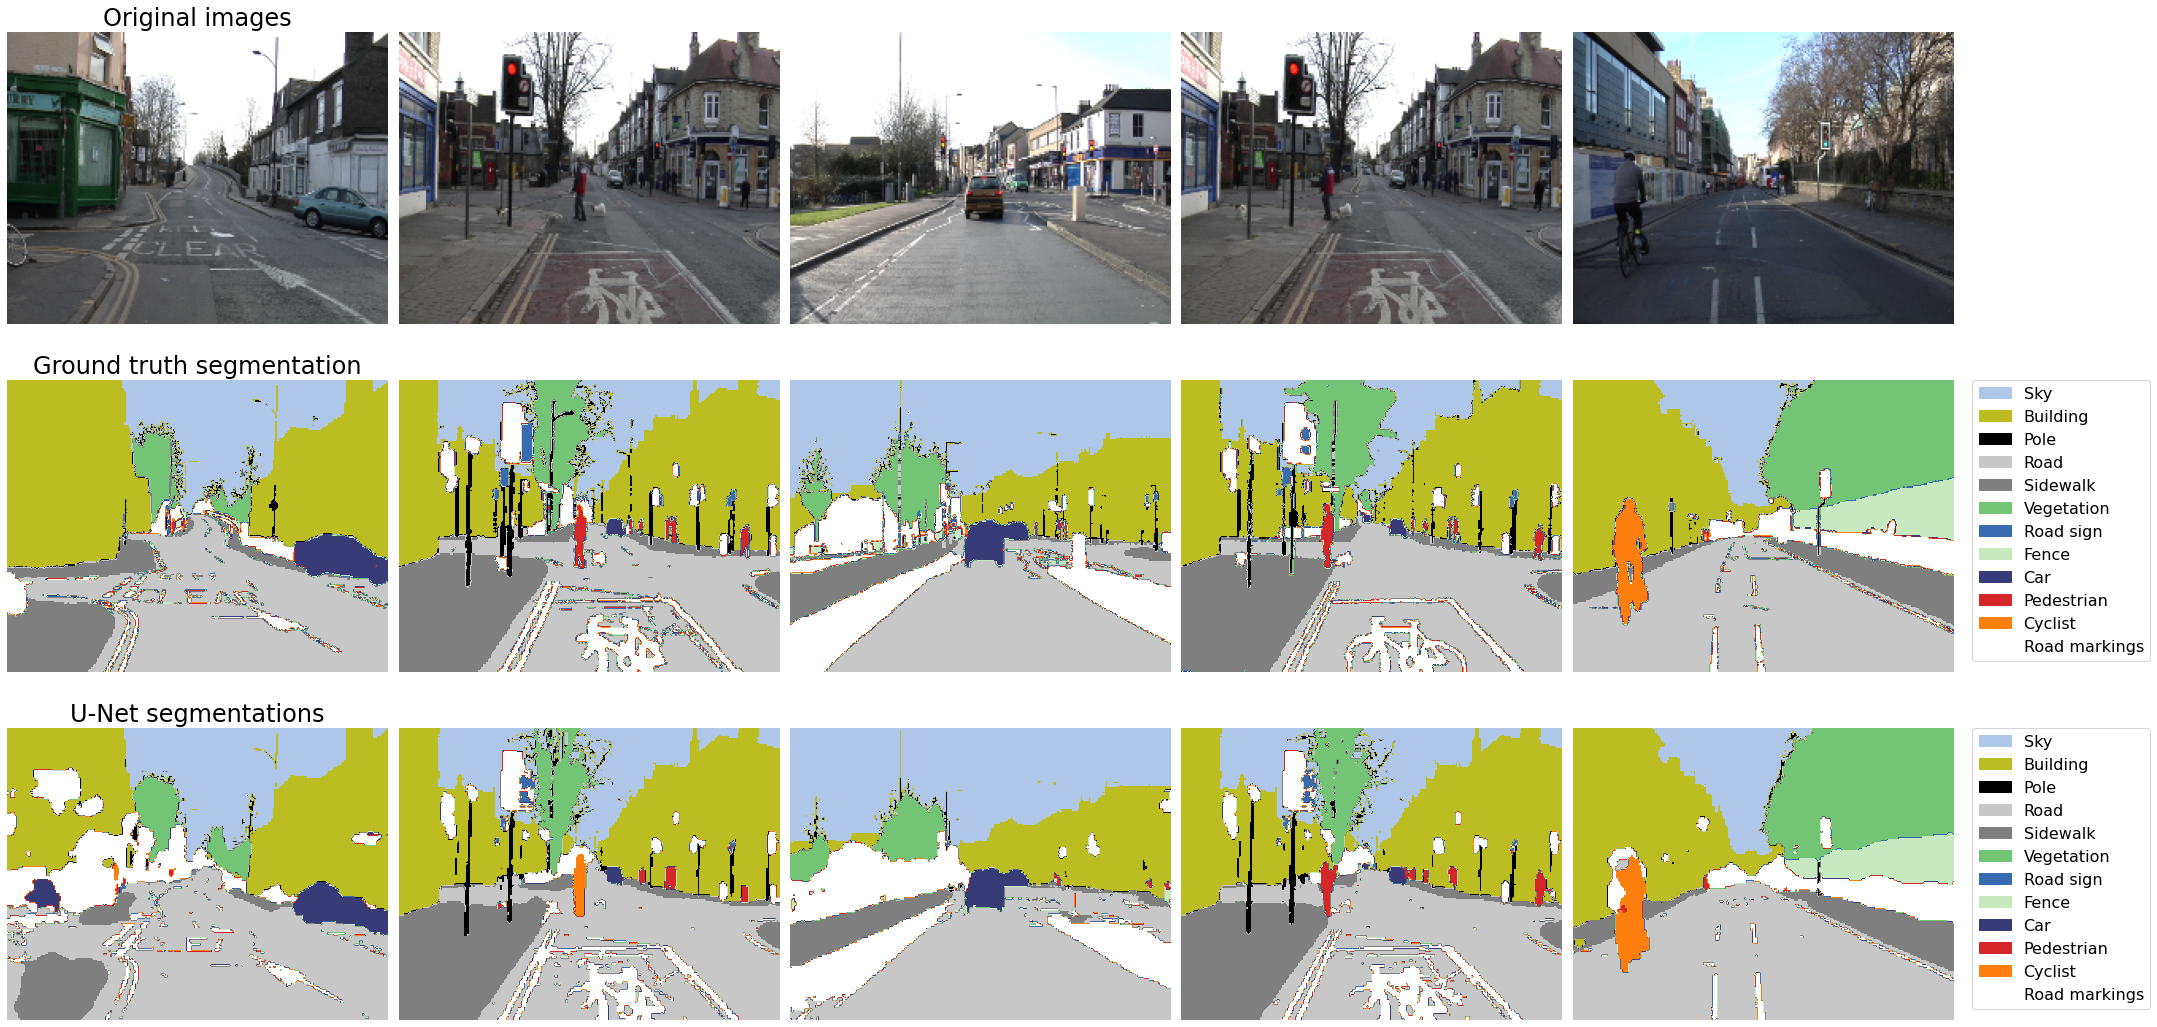

In [27]:
plt.rcParams['figure.figsize'] = [30, 15]

num_examples = 5

originals = x_te[:5]
ground_truth = np.squeeze(y_te[:num_examples] / (num_classes - 1))
predictions = tf.argmax(model.predict(x_te)[:num_examples], axis=3).numpy() / (num_classes - 1)

colors = np.zeros((num_classes, 3))

colors[(0, 1, 3, 4, 9, 10), :] = np.array(cm.get_cmap('tab20').colors)[(1, 16, 15, 14, 6, 2), :]
colors[2, :] = np.zeros(3)
colors[11, :] = np.ones(3)
colors[5:8, :] = np.array(cm.get_cmap('tab20c').colors)[9:12, :]
colors[8, :] = np.array(cm.get_cmap('tab20b').colors)[0, :]
colors[6, :] = np.array(cm.get_cmap('Accent').colors)[4, :]

custom_cm = lcm(colors)

labels = ['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Vegetation', 'Road sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Road markings']

patches = [mpatches.Patch(color=colors[i], label=labels[i] ) for i in range(num_classes)]

fig, axes = plt.subplots(nrows=3, ncols=num_examples)

for i, ax in enumerate(axes[0]):
    ax.imshow(originals[i], cmap=custom_cm)
    ax.axis('off')
    if i == 0:
        ax.set_title('Original images', size=24)
for i, ax in enumerate(axes[1]):
    ax.imshow(ground_truth[i], cmap=custom_cm)
    ax.axis('off')
    if i == 0:
        ax.set_title('Ground truth segmentation', size=24)
    if i == num_examples - 1:
        ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 16})
for i, ax in enumerate(axes[2]):
    ax.imshow(predictions[i], cmap=custom_cm)
    ax.axis('off')
    if i == 0:
        ax.set_title('U-Net segmentations', size=24)
    if i == num_examples - 1:
        ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 16})
fig.tight_layout()
plt.show()
